In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
file_path = 'thai.jpg'

In [3]:
img = cv2.imread(file_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_ycbcr = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [4]:
img_roi_hsv = np.copy(img_hsv)
img_roi_hsv[:][1] = 0
img_roi_hsv2rgb = cv2.cvtColor(img_roi_hsv, cv2.COLOR_HSV2RGB)

In [5]:
lower_blue = np.array([10,100,180])
upper_blue = np.array([20,255,255])
mask = cv2.inRange(img_hsv, lower_blue, upper_blue)

result_mask = cv2.bitwise_and(img_rgb, img_rgb, mask=mask)
result = cv2.cvtColor(result_mask, cv2.COLOR_BGR2RGB)

(<matplotlib.axes._subplots.AxesSubplot at 0x7fb329d47a10>,
 <matplotlib.image.AxesImage at 0x7fb329cc7d50>)

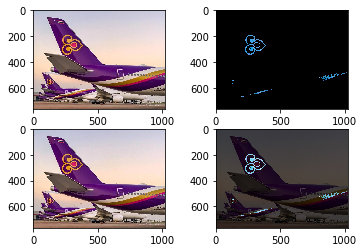

In [6]:
img_roi_rgb = cv2.addWeighted(result, 1, img_roi_hsv2rgb, 0.3, 0)

plt.subplot(2,2,1), plt.imshow(img_rgb)
plt.subplot(2,2,2), plt.imshow(result)
plt.subplot(2,2,3), plt.imshow(img_roi_hsv2rgb)
plt.subplot(2,2,4), plt.imshow(img_roi_rgb)

(<matplotlib.axes._subplots.AxesSubplot at 0x7fb329bd3c50>,
 <matplotlib.image.AxesImage at 0x7fb32810ef90>)

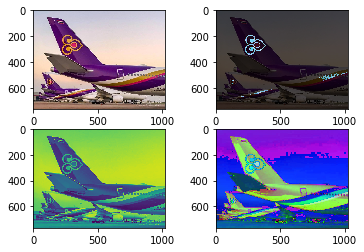

In [7]:
plt.figure('Figure 4')
plt.subplot(2, 2, 1), plt.imshow(img_rgb)
plt.subplot(2, 2, 2), plt.imshow(img_roi_rgb)
plt.subplot(2, 2, 3), plt.imshow(img_ycbcr)
plt.subplot(2, 2, 4), plt.imshow(img_hsv)